In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Cargar el archivo Excel
df = pd.read_excel("../data/test_relevance.xlsx")
df.head()

,Pregunta,Respuesta,Score,Descripción
0,Hoy me siento muy estresado porque mañana teng...,Entiendo cómo te sientes. El estrés antes de u...,4.5,"La respuesta es relevante y adecuada, ofrecien..."
1,"Saqué buena nota en la expo, valió la pena tra...",¡Qué bien! Felicitaciones por esa buena nota e...,5.0,"La respuesta es totalmente pertinente, celebra..."
2,"No dormí bien anoche por estar estudiando, me ...",Lamento que no hayas podido descansar bien. Es...,4.5,"La respuesta es relevante y adecuada, ofrecien..."
3,Hoy simplemente me siento buena energía.,¡Qué bien que te sientas así! La buena energía...,5.0,"La respuesta es totalmente pertinente, refleja..."
4,Tengo miedo de no pasar la materia este semestre.,Es normal sentir miedo ante la posibilidad de ...,4.5,La respuesta es relevante y adecuada al miedo ...


In [3]:
# Información del DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Pregunta     20 non-null     object 
 1   Respuesta    20 non-null     object 
 2   Score        20 non-null     float64
 3   Descripción  20 non-null     object 
dtypes: float64(1), object(3)
memory usage: 772.0+ bytes


In [4]:
# Descripción estadística de la columna 'Score'
df['Score'].describe()

count    20.000000
mean      4.600000
std       0.383886
min       4.000000
25%       4.500000
50%       4.500000
75%       5.000000
max       5.000000
Name: Score, dtype: float64

In [5]:
# Calcular estadísticas de Score
score_promedio = df['Score'].mean()
score_maximo = df['Score'].max()
score_minimo = df['Score'].min()

print(f"Score Promedio: {score_promedio:.2f}")
print(f"Score Máximo: {score_maximo}")
print(f"Score Mínimo: {score_minimo}")

Score Promedio: 4.60
Score Máximo: 5.0
Score Mínimo: 4.0


In [6]:
# Crear DataFrame con las estadísticas
estadisticas = {
    'Métrica': ['Promedio', 'Máximo', 'Mínimo'],
    'Score': [score_promedio, score_maximo, score_minimo]
}
stats_df = pd.DataFrame(estadisticas)
stats_df

,Métrica,Score
0,Promedio,4.6
1,Máximo,5.0
2,Mínimo,4.0


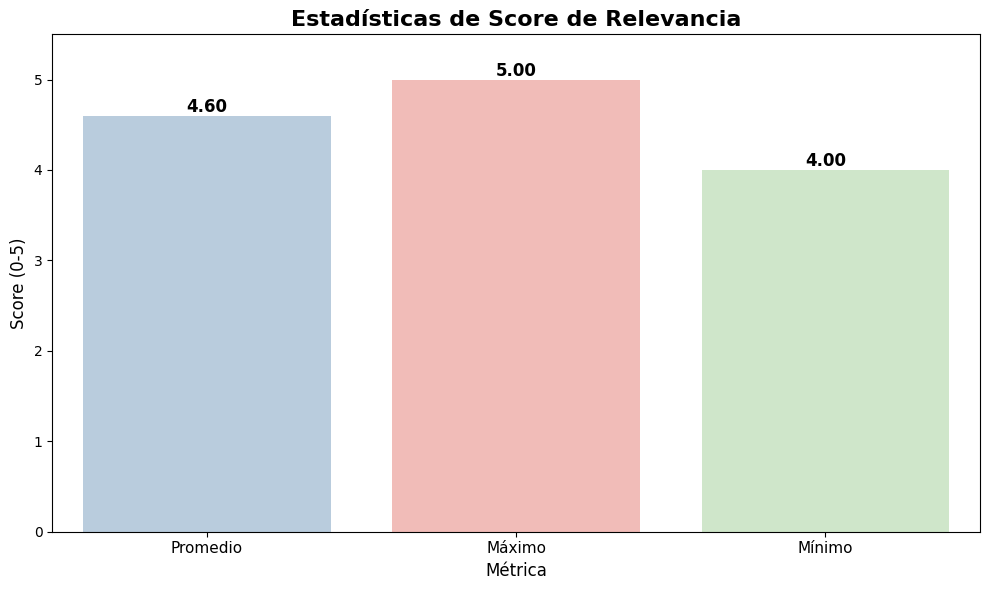

In [7]:
# Gráfico de barras con Promedio, Máximo y Mínimo
plt.figure(figsize=(10, 6))

colores = ['#B3CDE3', '#FBB4AE', '#CCEBC5']  # Paleta pastel
ax = sns.barplot(data=stats_df, x='Métrica', y='Score', hue='Métrica', palette=colores, legend=False)

# Agregar etiquetas encima de cada barra
for p in ax.patches:
    height = p.get_height()
    ax.annotate(
        f"{height:.2f}",
        (p.get_x() + p.get_width() / 2, height),
        ha='center',
        va='bottom',
        fontsize=12,
        fontweight='bold',
        color='black'
    )

plt.title('Estadísticas de Score de Relevancia', fontsize=16, fontweight='bold')
plt.ylabel('Score (0-5)', fontsize=12)
plt.xlabel('Métrica', fontsize=12)
plt.ylim(0, 5.5)  # Score máximo es 5
plt.xticks(fontsize=11)
plt.yticks(fontsize=10)
plt.tight_layout()

# Guardar la gráfica
plt.savefig('../plots/relevance_estadisticas.png', dpi=300, bbox_inches='tight')
plt.show()

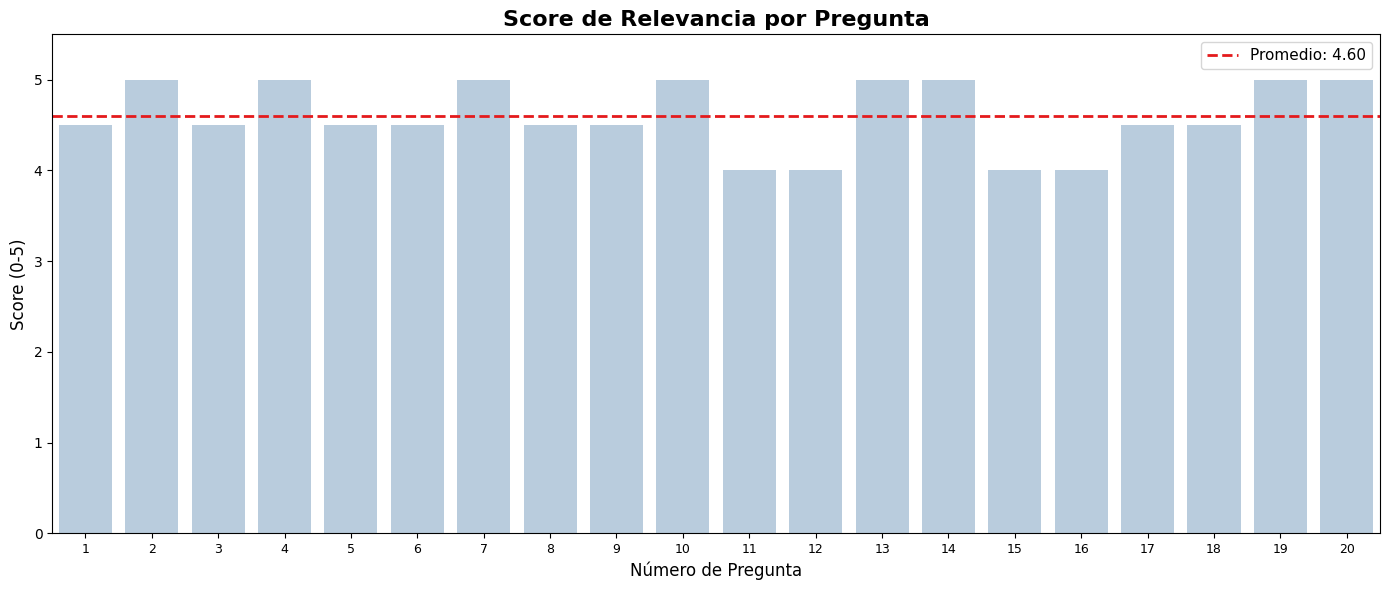

In [8]:
# Gráfico de Score por cada pregunta
plt.figure(figsize=(14, 6))

# Crear índice de preguntas
df['Pregunta_Num'] = range(1, len(df) + 1)

ax = sns.barplot(data=df, x='Pregunta_Num', y='Score', color='#B3CDE3')

# Línea horizontal para el promedio
plt.axhline(y=score_promedio, color='#E41A1C', linestyle='--', linewidth=2, label=f'Promedio: {score_promedio:.2f}')

plt.title('Score de Relevancia por Pregunta', fontsize=16, fontweight='bold')
plt.ylabel('Score (0-5)', fontsize=12)
plt.xlabel('Número de Pregunta', fontsize=12)
plt.ylim(0, 5.5)
plt.legend(fontsize=11)
plt.xticks(fontsize=9)
plt.yticks(fontsize=10)
plt.tight_layout()

# Guardar la gráfica
plt.savefig('../plots/relevance_por_pregunta.png', dpi=300, bbox_inches='tight')
plt.show()

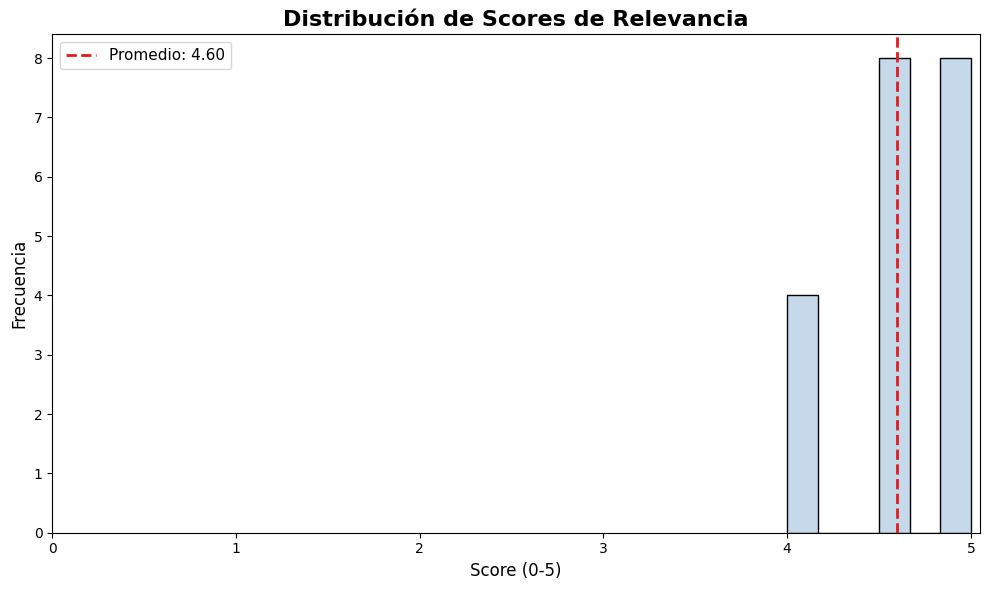

In [9]:
# Distribución de Scores (histograma)
plt.figure(figsize=(10, 6))

sns.histplot(df['Score'], bins=6, kde=False, color='#B3CDE3', edgecolor='black')

plt.axvline(x=score_promedio, color='#E41A1C', linestyle='--', linewidth=2, label=f'Promedio: {score_promedio:.2f}')

plt.title('Distribución de Scores de Relevancia', fontsize=16, fontweight='bold')
plt.xlabel('Score (0-5)', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.legend(fontsize=11)
plt.xticks([0, 1, 2, 3, 4, 5])
plt.tight_layout()

# Guardar la gráfica
plt.savefig('../plots/relevance_distribucion.png', dpi=300, bbox_inches='tight')
plt.show()